## Libraries


In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

## Functions

In [63]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [92]:
def build_model(model_name, x_train, y_train):
    if model_name == 'DecisionTree':
        model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
    elif model_name == 'LogisticRegression':
        model = LogisticRegression(max_iter=100, random_state=42)
    else:
        raise ValueError("Model not recognized")
    
    model.fit(x_train, y_train)
    return model

In [65]:
def train_evaluate_model(model_name, model, x_test, y_test):
    y_pred = model.predict(x_test)
    
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=["Not Approved", "Approved"]))
    
    return model

## Loading data & Preprocessing 

In [66]:
df = pd.read_csv(r"C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\loan_approval_dataset.csv")

In [67]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [68]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [70]:
df[' education'].value_counts()

 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [71]:
df[' self_employed'].value_counts()

 self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [72]:
df[' loan_status'].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

All the columns that need to be encoded only have two categories , so we're gonna use label encoding for them.
But first we'll check for outliers

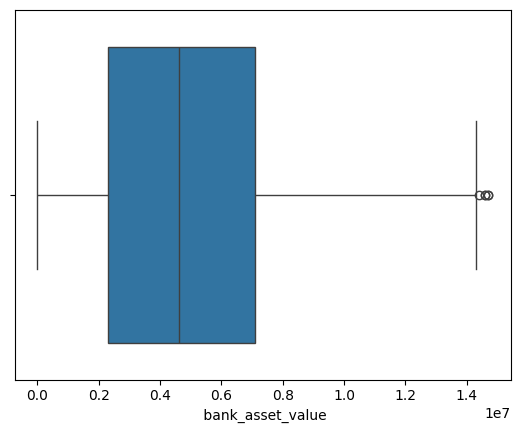

In [73]:
sns.boxplot(x=' bank_asset_value', data=df)
plt.show()

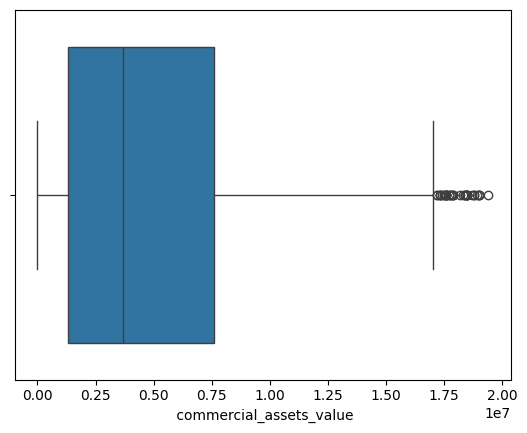

In [74]:
sns.boxplot(x=' commercial_assets_value', data=df)
plt.show()

In [75]:
df = remove_outliers(df, ' bank_asset_value')
df = remove_outliers(df, ' commercial_assets_value')

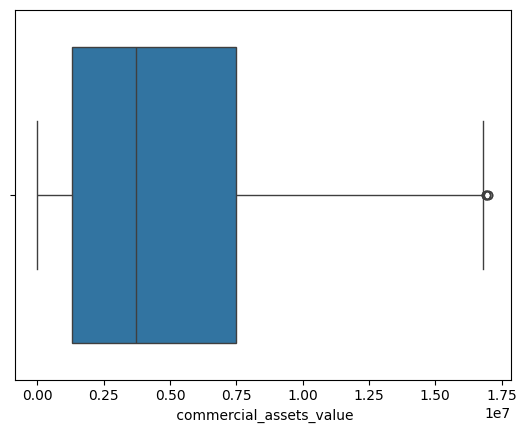

In [76]:
sns.boxplot(x=' commercial_assets_value', data=df)
plt.show()

Encoding

In [77]:
le = LabelEncoder()

In [78]:
df[' education'] = le.fit_transform(df[' education'])
df[' self_employed'] = le.fit_transform(df[' self_employed'])
df[' loan_status'] = le.fit_transform(df[' loan_status'])

In [79]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
5,6,0,0,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,1


## Splitting data

In [80]:
x = df.drop(columns=[' loan_status'])
y = df[' loan_status']

We'll scale the data so the left-over outliers don't affect the models

In [81]:
r_scaler = RobustScaler()
x = r_scaler.fit_transform(x)

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Building & Training models

In [93]:
dt_model = build_model('DecisionTree', x_train, y_train)
lr_model = build_model('LogisticRegression', x_train, y_train)

In [94]:
train_evaluate_model('Logistic Regression',lr_model, x_test, y_test)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

Not Approved       0.92      0.95      0.93       512
    Approved       0.92      0.87      0.89       334

    accuracy                           0.92       846
   macro avg       0.92      0.91      0.91       846
weighted avg       0.92      0.92      0.92       846



LogisticRegression(random_state=42)

In [95]:
train_evaluate_model('Decision Tree',dt_model, x_test, y_test)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

Not Approved       0.99      0.96      0.98       512
    Approved       0.95      0.99      0.97       334

    accuracy                           0.97       846
   macro avg       0.97      0.97      0.97       846
weighted avg       0.97      0.97      0.97       846



DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

Using SMOTE to fix imbalance

In [96]:
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [97]:
lr_smote_model = build_model('LogisticRegression', x_train_res, y_train_res)
dt_smote_model = build_model('DecisionTree', x_train_res, y_train_res)

In [98]:
train_evaluate_model('Logistic Regression with SMOTE', lr_smote_model, x_test, y_test)
train_evaluate_model('Decision Tree with SMOTE', dt_smote_model, x_test, y_test)

Classification Report for Logistic Regression with SMOTE:
              precision    recall  f1-score   support

Not Approved       0.95      0.94      0.94       512
    Approved       0.90      0.93      0.91       334

    accuracy                           0.93       846
   macro avg       0.93      0.93      0.93       846
weighted avg       0.93      0.93      0.93       846

Classification Report for Decision Tree with SMOTE:
              precision    recall  f1-score   support

Not Approved       0.99      0.96      0.98       512
    Approved       0.95      0.99      0.97       334

    accuracy                           0.97       846
   macro avg       0.97      0.98      0.97       846
weighted avg       0.97      0.97      0.97       846



DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

Checking if the models are overfitting

In [99]:
print("Train accuracy:", dt_smote_model.score(x_train, y_train))
print("Test accuracy:", dt_smote_model.score(x_test, y_test))            

Train accuracy: 0.9710230632761679
Test accuracy: 0.9728132387706856


In [100]:
print("Train accuracy:", lr_smote_model.score(x_train, y_train))
print("Test accuracy:", lr_smote_model.score(x_test, y_test))  

Train accuracy: 0.9210526315789473
Test accuracy: 0.9314420803782506


Since the gaps between the accuracies is small, it means low overfitting.

In [101]:
print("Train accuracy:", dt_model.score(x_train, y_train))
print("Test accuracy:", dt_model.score(x_test, y_test))           

Train accuracy: 0.9710230632761679
Test accuracy: 0.9728132387706856


In [102]:
print("Train accuracy:", lr_model.score(x_train, y_train))
print("Test accuracy:", lr_model.score(x_test, y_test))       

Train accuracy: 0.9175044352454169
Test accuracy: 0.9160756501182034
